In [1]:
# Feature extraction - data compression with goal of maintaining most of the relevant information
#                    - project data onto new feature space
#                    - improve computational efficiency but also help reduce curse of dimensionality

# Principal component analysis (PCA):
# - unsupervised linear transformation technique
# - find directions of maximum variance in high-dimensional data and projects it onto new subspace with equal or fewer
# dimensions than the original one.
# - orthogoal axes (principal components) - directions of maximum variance given constraint that new features 
# orthogonal to each other
# - Steps:
# 1. Standardize the d-dimensional dataset.
# 2. Construct the covariance matrix.
# 3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
# 4. Select k eigenvectors that correspond to the k largest eigenvalues, where k is the dimensionality of the new
# feature subspace (k <= d).
# 5. Construct a projection matrix W from the "top" k eigenvectors.
# 6. Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional
# feature subspace

In [2]:
# wine dataset
import pandas as pd 
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [4]:
# process idata into training and test sets and standardize to unit variance
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
                train_test_split(X, y,
                                 test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
# covariance - measure of joint variability of two random variables
# - positive means features increase or decrease together, negative means features vary in opposite directions
# Eigenvectors of covariance matrix represents principle components (directions of maximum variance)
# Corresponding eigenvalues define their magnitude

import numpy as np
cov_mat = np.cov(X_train_std.T) # covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) # eigen decomposition
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


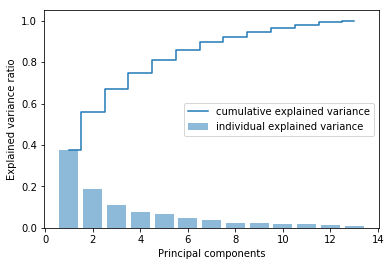

In [9]:
# Variance explained ratios of eigenvalues = franction of eigenvalue over sum of total eigenvalues
%matplotlib inline

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
          sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [14]:
# Feature transformation
# Transformt he wine dataset onto new principal component axes

# Sort eigenpairs in decreasing order of eigenvalues
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [23]:
# Collect two eigenvectors that correspond to two largest values to caputre 60 percent of the variance in dataset
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], # np.newaxis adds another dimension (1d to 2d)
              eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [24]:
# we created a 13 x 2 dimensional projection matrix W
# project a sample x into x', x' = xW
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

In [31]:
# Transform entire 124 x 13 - dimensional training dataset onto 2 principal components by calculating 
# the matrix dot product
# X' = XW
X_train_pca = X_train_std.dot(w)

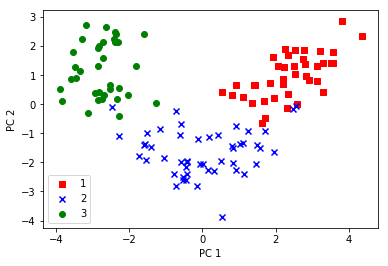

In [34]:
# Visualize transformed wine training set, stored as 124 x 2 - dimension matrix
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
               X_train_pca[y_train==l, 1],
               c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

# data is more spread along x-axis (first principal component) than y-axis (second principal component)
# linear classifier will separate the classes well

In [30]:
y_train

array([1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2, 3,
       3, 2, 2, 2, 3, 3, 1, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1, 1, 2,
       1, 2, 2, 1, 3, 2, 1, 2, 2, 2, 3, 1, 3, 3, 1, 1, 2, 3, 1, 1, 2, 2, 1,
       1, 1, 3, 2, 1, 2, 3, 1, 2, 3, 3, 1, 1, 3, 1, 3, 2, 1, 1, 2, 1, 3, 2,
       3, 1, 3, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3, 3, 1, 1, 3, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 1, 3])